In [4]:
from pathlib import Path
import numpy as np
import pandas as pd
import rasterio as rio
import imageio.v3 as iio
import matplotlib.pyplot as plt
import skimage

from data.inria import InriaImageFolder 

In [14]:
DATA = Path.home() / "datasets" / "urban_footprint" 
SCENE = "austin1.tif"
IMAGE_PATH = DATA / "scenes" / "images" / SCENE 
MASK_PATH = DATA / "scenes" / "masks" / SCENE 

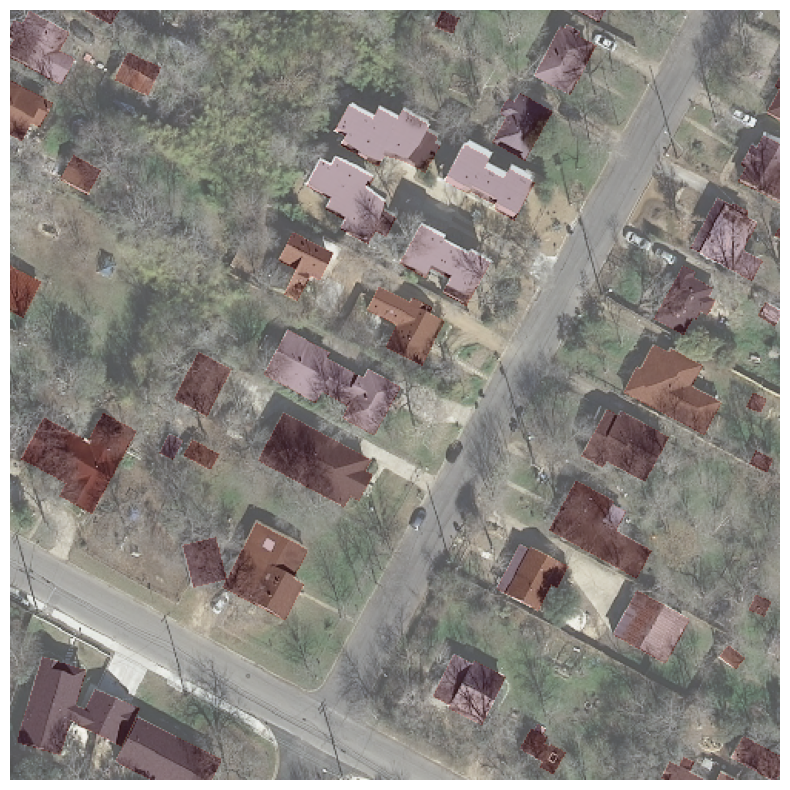

In [43]:
image = iio.imread(IMAGE_PATH)[2500:3000, 2500:3000, :]
mask = iio.imread(MASK_PATH)[2500:3000, 2500:3000]

fig, ax = plt.subplots(1, 1, figsize = (10, 10))
ax.imshow(image);
ax.imshow(mask, cmap = "Reds", alpha = 0.25);
ax.axis("off");
#plt.close()

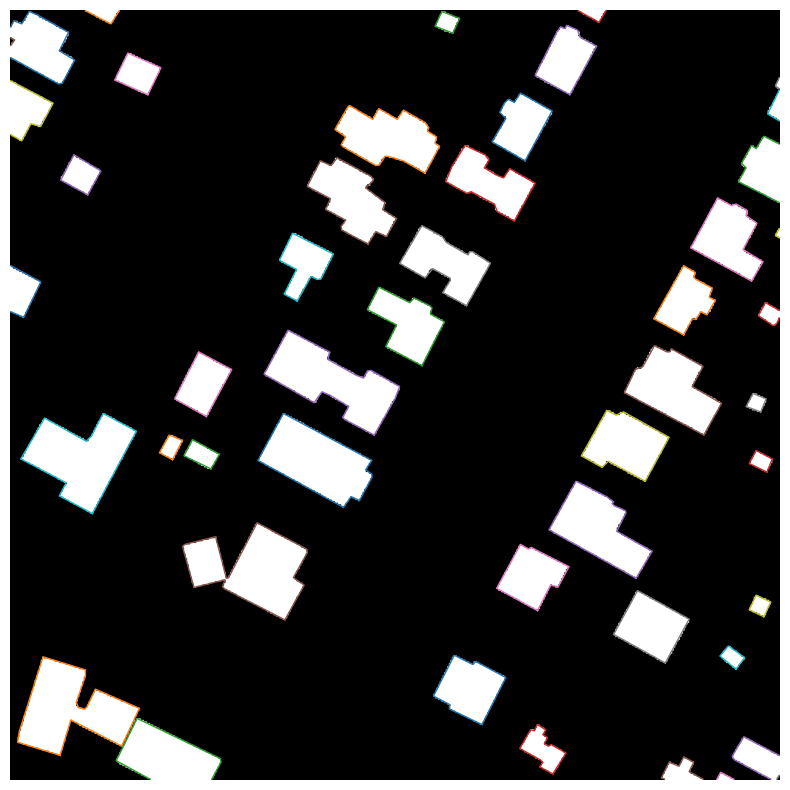

In [85]:
contours = skimage.measure.find_contours(mask)
fig, ax = plt.subplots(1,1, figsize = (10, 10))
ax.imshow(mask, cmap = "gray")
for contour in contours:
    contour = skimage.measure.approximate_polygon(contour, 1)
    ax.plot(contour[:, 1], contour[:, 0], linewidth=1)
ax.axis("off");